In [1]:
# Load neccesary libraries 
import os
import tweepy as tw
import pandas as pd
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Authenticatate request
consumer_key= 'redactedconsumer_secret= 'redactedaccess_token= 'redactedaccess_token_secret= 'redacted
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
# Find tweets with keywords in date range
search_words = "stanford+covid"
date_since = "2020-03-25"

tweets = tw.Cursor(api.search,
    q=search_words,
    lang="en",
    since=date_since, result_type="popular").items(100)

In [6]:
# Put desired fields into pandas data frame
tweet_fields = [[tweet.user.screen_name, tweet.text, tweet.user.location, tweet.created_at, tweet.favorite_count, tweet.retweet_count, tweet.user.verified, tweet.retweeted] for tweet in tweets]

tweet_info = pd.DataFrame(data=tweet_fields, 
                    columns=['user', 'tweet','location', 'created_at', 'favorite_count', 'retweet_count', 'verified', 'retweeted'])

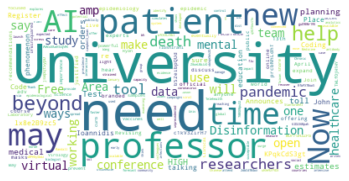

In [11]:
# Create text string for word cloud
text = " ".join(tweet for tweet in tweet_info.tweet)

stopwords = set(STOPWORDS)
stopwords.update(["https","stanford", "covid-19", "co", "covid"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()